#  LAB 7- ED21B069 Shobhith Vadlamudi

1) Plot the surface J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2. Also, generated the corresponding contour plot. Label the plots appropriately. Give a suitable title for the figure.  (2 marks)

In [206]:
import numpy as np
import matplotlib.pyplot as plt

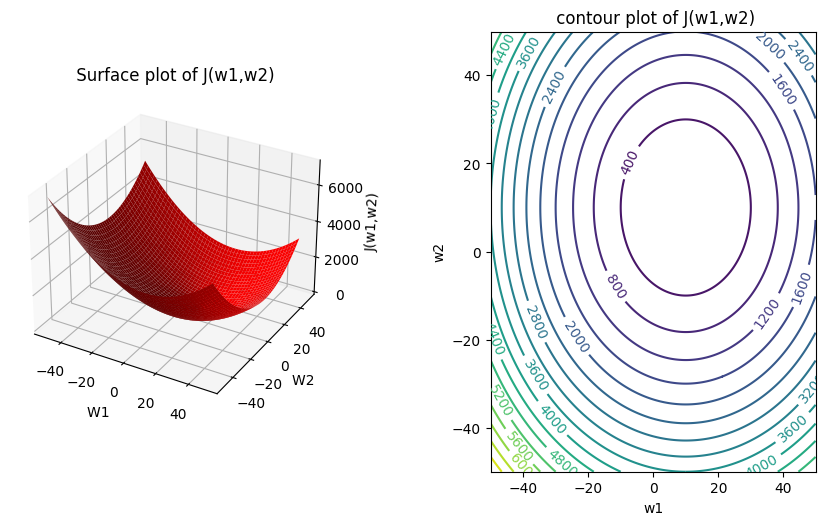

In [207]:
w1=np.arange(-50.0,50.0,0.1)
w2=np.arange(-50.0,50.0,0.1)
W1,W2=np.meshgrid(w1,w2)
Z=(W1-10)**2+ (W2-10)**2
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(121,projection='3d')
ax.plot_surface(W1,W2,Z,color='red')
ax.set_xlabel("W1 ")
ax.set_ylabel("W2 ")
ax.set_zlabel("J(w1,w2)")
ax.set_title(" Surface plot of J(w1,w2)")

# generating contour plot
w1=np.arange(-50.0,50.0,0.1)
w2=np.arange(-50.0,50.0,0.1)
W1,W2=np.meshgrid(w1,w2)
Z=(W1-10)**2+ (W2-10)**2
ax2=fig.add_subplot(122)
cp=ax2.contour(w1,w2,Z,levels=20)
ax2.set_xlabel("w1")
ax2.set_ylabel("w2")
ax2.set_title(" contour plot of J(w1,w2)")
fig.tight_layout(pad=7)
plt.clabel(cp,fontsize=10)
plt.show()

2) For the function J(w) = w^2 + (54/w), implement the following methods: (a) bracketing method (choose you own a, b, n). (b) Use the bracketed value to get to the critical point employing interval halving method and (c) identify the critical point using Newton-Raphson method and (d) verify the result manually using the optimality criteria (post this write-up as well in .jped/.png etc). (8 marks, 2 each)

Text(0.5, 1.0, 'J(w)')

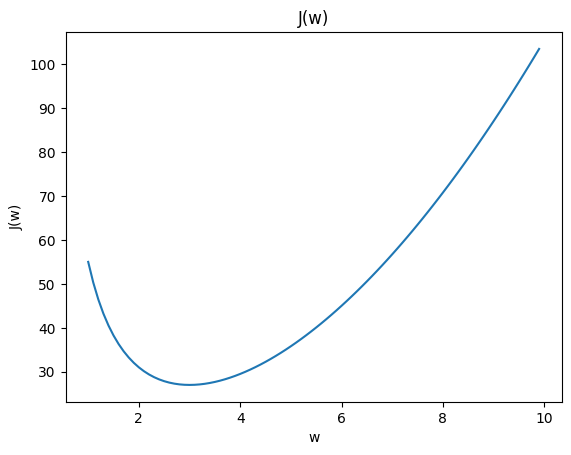

In [208]:
w=np.arange(1,10,0.1)
J=w**2+(54/w)
plt.plot(w,J)
plt.xlabel("w")
plt.ylabel("J(w)")
plt.title("J(w)")

In [209]:
# using bracketing method- Exhaustive search
a=1
b=10
n=10
delta=(b-a)/n
x1=a
x2=x1+delta
x3=x2+delta
def J(w):
    J=w**2+(54/w)
    return J

while x3<=b:
    if J(x1)>=J(x2)<=J(x3):
        print(f"The minima lies occurs between J({x1}) and J({x3})")
        break
    else:
        x1=x2
        x2=x3
        x3=x2+delta
else:
    print("slope is not zero between a and b")



The minima lies occurs between J(1.9) and J(3.6999999999999997)


Using interval halving method- 

In [210]:

wm=(x1+x3)/2
L=x3-x1
w1=x1+L/4
w2=x3-L/4
e=0.001
def J(w):
    J=w**2+(54/w)
    return J
def modu(L):
    if L>=0:
      return L
    if L<0:
       return L*-1

while modu(L)>e:
  if J(w1)<J(wm):
      x3=wm
      wm=w1
      L=x3-x1
      w1=x1+L/4
      w2=x3-L/4
      
     
  else:
      if J(w2)<J(wm):
       x1=wm
       wm=w2
       L=x3-x1
       w1=x1+L/4
       w2=x3-L/4
       
       
      else:
         x1=w1
         x3=w2
         L=x3-x1
         w1=x1+L/4
         w2=x3-L/4
         
     

print(f"The minima lies between J({x1}) and J({x3})")
   
      

The minima lies between J(2.99951171875) and J(3.000390625)


Using Newton-Raphson method 

In [211]:
w=1
k=1
e=0.000001
def j_dash(w):
    J_dash=(J(w+e)-J(w))/e # using 1st principle
    return J_dash
    
def j_ddash(w):
    J_ddash=(j_dash(w+e)-j_dash(w))/e
    return J_ddash
while (modu(j_dash(w))>e):
     w=w-j_dash(w)/j_ddash(w)

print(f"The minima lies at J({w})")

The minima lies at J(2.9999995000520934)


3) Use the code developed for Question 2 to find the critical point of the function f(w) = sin (w) in the interval (0,pi)  and verify the result manually using the optimality criteria (post this write-up  in .jped/.png etc). Plot the optimal points found by both methods. (5 marks , 3 +2)

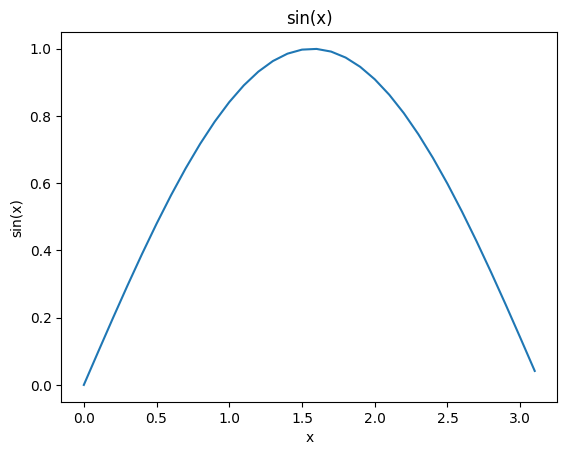

In [212]:
import math
x=np.arange(0,math.pi,0.1)
J=(np.sin(x))
plt.plot(x,J)
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("sin(x)")
# To use the code from Q.2 we will convert this problem to a minima problem
# critical point occurs when derivative=0 that is at the maxima here
def K(w):
    k=-(np.sin(w))
    return k

In [213]:
# using bracketing method- Exhaustive search
a=1
b=3
n=10
delta=(b-a)/n
x1=a
x2=x1+delta
x3=x2+delta

while x3<=b:
    if K(x1)>=K(x2)<=K(x3):
        print(f"The critical point lies in between {x1} and {x3}")
        break
    else:
        x1=x2
        x2=x3
        x3=x2+delta
else:
    print("slope is not zero between a and b")

The critical point lies in between 1.4 and 1.7999999999999998


In [214]:

wm=(x1+x3)/2
L=x3-x1
w1=x1+L/4
w2=x3-L/4
e=0.001
def modu(L):
    if L>=0:
      return L
    if L<0:
       return L*-1

while modu(L)>e:
  if K(w1)<K(wm):
      x3=wm
      wm=w1
      L=x3-x1
      w1=x1+L/4
      w2=x3-L/4
      
     
  else:
      if K(w2)<K(wm):
       x1=wm
       wm=w2
       L=x3-x1
       w1=x1+L/4
       w2=x3-L/4
       
       
      else:
         x1=w1
         x3=w2
         L=x3-x1
         w1=x1+L/4
         w2=x3-L/4
         
     

print(f"The critical point lies between x={x1} and x={x3}")

The critical point lies between x=1.5703125 and x=1.57109375


In [215]:
w=1
k=1
e=0.0001
def k_dash(w):
    J_dash=(K(w+e)-K(w))/e # using 1st principle
    return J_dash
    
def k_ddash(w):
    K_ddash=(k_dash(w+e)-k_dash(w))/e
    return K_ddash
while (modu(k_dash(w))>e):
     w=w-k_dash(w)/k_ddash(w)

print(f"The critical point occurs at x={w}")

The critical point occurs at x=1.5707463267954787


Text(0.5, 1.0, 'sin(x)')

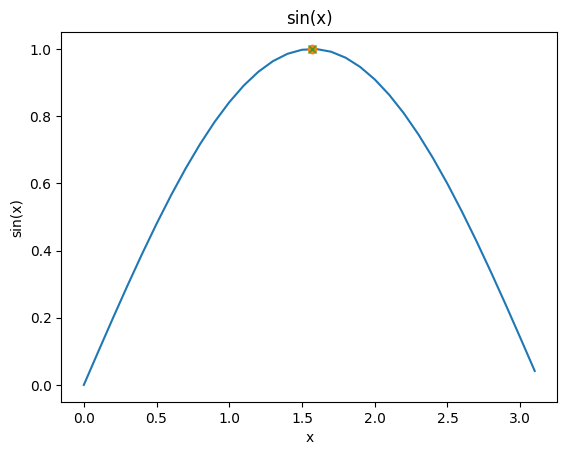

In [216]:
import math
x=np.arange(0,math.pi,0.1)
M=(np.sin(x))
plt.plot(x,M)
plt.plot(w,np.sin(w),'o')
plt.plot(wm,np.sin(wm),'x')
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("sin(x)")

